# Sentiment Analysis Using SentiwordNet and Spacy on Pfizer Tweet Dataset

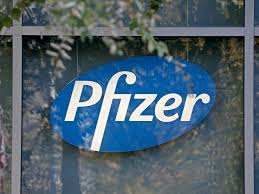

This dataset is about the pfizer tweets and here we are gonna explore it using spacy and sentiwordnet to get some sentiments on the tweets without any labels . Hope you like it :)

# Importing The Packages

In [ ]:
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import re
import spacy
from nltk.corpus import sentiwordnet as swn
from IPython.display import clear_output
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly
plotly.offline.init_notebook_mode (connected = True)

# Importing The Data

In [ ]:
data=pd.read_csv('../input/pfizer-vaccine-tweets/vaccination_tweets.csv')

# Having a look at the data

In [ ]:
data=data[['text']]

In [ ]:
data.head()

# Preprocessing The Data

In [ ]:
# Function to preprocess the tweets data
def preprocess_tweet_data(data,name):
    # Proprocessing the data
    data[name]=data[name].str.lower()
    # Code to remove the Hashtags from the text
    data[name]=data[name].apply(lambda x:re.sub(r'\B#\S+','',x))
    # Code to remove the links from the text
    data[name]=data[name].apply(lambda x:re.sub(r"http\S+", "", x))
    # Code to remove the Special characters from the text 
    data[name]=data[name].apply(lambda x:' '.join(re.findall(r'\w+', x)))
    # Code to substitute the multiple spaces with single spaces
    data[name]=data[name].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
    # Code to remove all the single characters in the text
    data[name]=data[name].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
    # Remove the twitter handlers
    data[name]=data[name].apply(lambda x:re.sub('@[^\s]+','',x))

# Function to tokenize and remove the stopwords    
def rem_stopwords_tokenize(data,name):
      
    def getting(sen):
        example_sent = sen

        stop_words = set(stopwords.words('english')) 

        word_tokens = word_tokenize(example_sent) 

        filtered_sentence = [w for w in word_tokens if not w in stop_words] 

        filtered_sentence = [] 

        for w in word_tokens: 
            if w not in stop_words: 
                filtered_sentence.append(w) 
        return filtered_sentence
    x=[]
    for i in data[name].values:
        x.append(getting(i))
    data[name]=x
# Making a function to lemmatize all the words
lemmatizer = WordNetLemmatizer() 
def lemmatize_all(data,name):
    arr=data[name]
    a=[]
    for i in arr:
        b=[]
        for j in i:
            x=lemmatizer.lemmatize(j,pos='a')
            x=lemmatizer.lemmatize(x)
            b.append(x)
        a.append(b)
    data[name]=a
# Function to make it back into a sentence 
def make_sentences(data,name):
    data[name]=data[name].apply(lambda x:' '.join([i+' ' for i in x]))
    # Removing double spaces if created
    data[name]=data[name].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))



In [ ]:
# Using the preprocessing function to preprocess the tweet data
preprocess_tweet_data(data,'text')
# Using tokenizer and removing the stopwords
rem_stopwords_tokenize(data,'text')
# Converting all the texts back to sentences
make_sentences(data,'text')

# Using spacy to Position of a words and working it with sentiwordnet

So when we are working with sentiwordnet we need to know the characterstic of the word for which we want to know the sentiment . So for finding that position of the word here we are gonna use Spacy.pos_ which tells us about the position of the word which then is used to get the sentiment using the sentiwordnet . We then average out the score for both the positive and the negative score from the whole sentence .
The positions compatible with the sentiwordnet are:
* n - NOUN
* v - VERB
* a - ADJECTIVE
* s - ADJECTIVE SATELLITE
* r - ADVERB

In [ ]:
# Getting nlp from spacy.load
nlp=spacy.load('en')
# Making the function to get the sentiments out of the dataframe
def get_sentiment(data,name):
    count=1
    l=len(data)
    positive_sentiments=[]
    negative_sentiments=[]
    for tex in data[name].values:
        print('The current status is :',count*100/l,'%')
        tex=nlp(tex)
        noun=[]
        verb=[]
        adj=[]
        adv=[]
        for i in tex :
            if i.pos_=='NOUN':
                noun.append(i)
            elif i.pos_ =='ADJ':
                adj.append(i)
            elif i.pos_ =='VERB':
                verb.append(i)
            elif i.pos_=='ADV':
                adv.append(i)
        clear_output(wait=True)
        count+=1
        neg_score=[]
        pos_score=[]
        for i in tex :
            try:
                if i in noun:
                    x=swn.senti_synset(str(i)+'.n.01')
                    neg_score.append(x.neg_score())
                    pos_score.append(x.pos_score())
                elif i in adj:
                    x=swn.senti_synset(str(i)+'.a.02')
                    neg_score.append(x.neg_score())
                    pos_score.append(x.pos_score())
                elif i in adv :
                    x=swn.senti_synset(str(i)+'.r.02')
                    neg_score.append(x.neg_score())
                    pos_score.append(x.pos_score())
                elif i in verb :
                    x=swn.senti_synset(str(i)+'.v.02')
                    neg_score.append(x.neg_score())
                    pos_score.append(x.pos_score())

            except:
                pass
        positive_sentiments.append(np.mean(pos_score))
        negative_sentiments.append(np.mean(neg_score))

    data['Positive Sentiment']=positive_sentiments
    data['Negative Sentiment']=negative_sentiments

In [ ]:
get_sentiment(data,'text')

In [ ]:
data.head()

Making the columns for the sentiments(Positive and Neagative ) and declearing overall sentiment which sohows whether the data is positive negative or neutral .

In [ ]:
overall=[]
for i in range(len(data)):
    if data['Positive Sentiment'][i]>data['Negative Sentiment'][i]:
        overall.append('Positive')
    elif data['Positive Sentiment'][i]<data['Negative Sentiment'][i]:
        overall.append('Negative')
    else:
        overall.append('Neutral')
data['Overall Sentiment']=overall
        


In [ ]:
data.head()

In [ ]:
sns.countplot(data['Overall Sentiment'])

# Histogram For Negative Sentiment

In [ ]:
px.histogram(data['Negative Sentiment'],color=data['Overall Sentiment'])

Well from this we can clearly see when the negative sentiment score of the sentence increases there is a high chance for that sentnence being overall negative but we do see some exceptions while the negative sentiment score is between 0-0.2 .

# Histogram For Positive Sentiment Score

In [ ]:
px.histogram(data['Positive Sentiment'],color=data['Overall Sentiment'])

Well we can see from this data that when there is a positive sentiment score between 0-0.17 we can see the exceptions anf the data can be clearly negative but when the positive score increases from 0.17 it's clear that the sentence is gonna be positive  .

# Word Cloud For All The Positive Words :

In [ ]:
text=' '
for i in data[data['Overall Sentiment']=='Positive']['text']:
    text+=i+' '
    
# Make the figure
wordcloud = WordCloud().generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

# Word Cloud For The Negative Words

In [ ]:
text=' '
for i in data[data['Overall Sentiment']=='Negative']['text']:
    text+=i+' '
    
# Make the figure
wordcloud = WordCloud().generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

# Hope you liked the file :)
# Give an upvote if you got to learn something from the file :)
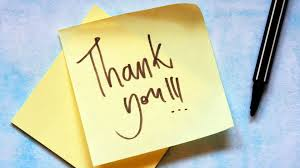